In [2]:
import numpy as np
import matplotlib.pyplot

### Probabilistic logic and statistical inference

giving a set of data you want to know where the mean and other mesurement are likely to be if we take another set of data from the same distributions
* statistical inference: the process which we go from measured data to probabilistic conclusions about what we might expect if we collect the same data again

### Random number generators and hacker statistics

hacker statistics: instead of repeating data acquisition again and again ,we use python to simulate those repeated measurement

example : simulation fo flipping four coins
    

probability of having four heads on four flips is : 0.078


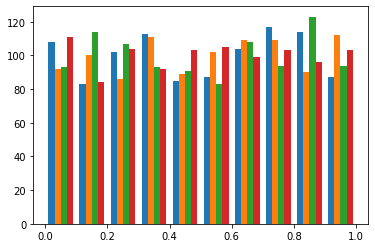

In [20]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(20)
arr=np.random.rand(1000,4)
res=np.all(arr > 0.5, axis=1)
print("probability of having four heads on four flips is : "+str(len(arr[np.where(res)])/1000))
_ = plt.hist(arr)
plt.show()

## How many defaults might we expect?
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


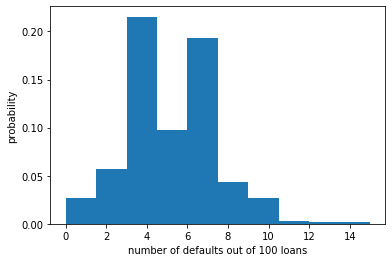

In [21]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number=np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number<p:
            n_success+=1

    return n_success
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults=np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults,normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

# PMF(probability mass function)

the set of probabilities of discrete outcomes
for exapmle we have :
### binomial distribution 

the number r of success in n bernouli trials with probability p of success

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


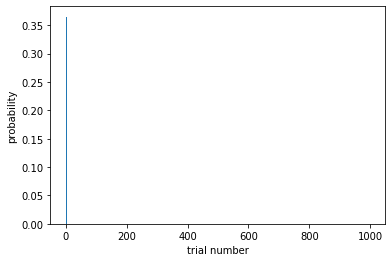

In [26]:
np.random.seed(20)
arr=np.random.binomial(4,0.5,size=1000)
#res=arr[np.where(arr==4)]
#print(len(res)/1000)
# Compute bin edges: bins
bins = np.arange(0, len(arr) + 1) - 0.5

# Generate histogram
plt.hist(arr,bins=bins,normed=True)

# Label axes
plt.xlabel("trial number")
plt.ylabel("probability")

# Show the plot
plt.show()

### Poison distribution

the timing of next event is completely independent of when the previous event happened 

for example :
* in a town X the arrival of bus is completely different from the previous one
* natural birth in a hospital 
* hit on a website in a specefic hour 
* aviations accident

so in conclusion :
* the number r of events in a given interval of time where the average rate of p per interval 
* the poison D is the limit of the binomial D for low probability of success(<0.05) and large numbrer of trials(rare events)


In [28]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson=np.random.poisson(10,10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n=[20,100,1000]
p=[0.5,0.1,0.01]
# np=10
# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.0176 3.146250187127527
n = 20 Binom: 9.9907 2.2319080424605313
n = 100 Binom: 9.9974 2.976876423367285
n = 1000 Binom: 10.0123 3.154512436177737


### How many no-hitters in a season?
In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. 

1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season

In [29]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters=np.random.poisson(251/115,10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)

# Compute probability of getting seven or more: p_large
p_large=n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0082
